# Quantum Circuit Implementation and Comparison

Minette Farrell 

23566892

## Introduction

In this project, I implement a simple quantum circuit in Python and compare its results with those obtained using Qiskit. The goal is to apply a sequence of quantum gates to a quantum state and perform probabilistic measurements to obtain measurement outcomes.

## Quantum Gates and Matrices

I start by defining several fundamental quantum gate matrices:

- `x_matrix`: The Pauli-X gate matrix.
- `y_matrix`: The Pauli-Y gate matrix.
- `z_matrix`: The Pauli-Z gate matrix.
- `h_matrix`: The Hadamard gate matrix.
- `cnot_matrix`: The Controlled-X (CNOT) gate matrix.
- `swap_matrix`: The Swap gate matrix.
- `U_matrix`: A custom unitary gate matrix (Note: it should be U_matrix, not unitary_matrix).

## Applying Gates to a Quantum State

I defined a function `gate` that applies a given gate matrix to a quantum state, either to a specific qubit or to the entire state, depending on the input. The function ensures that the original state is not modified by making a copy of it.

I also defined a function `apply_gate` that takes a sequence of gate symbols and qubits and applies the corresponding gates to the quantum state. The function handles various gate symbols, including X, Y, Z, H, CX (CNOT), S (Swap), and U (Custom Unitary).

## Simulating Measurements

To simulate quantum measurements probabilistically, I defined a function `measurement` that calculates the probabilities of measurement outcomes (00, 01, 10, and 11) based on the current quantum state. It then randomly selects one of these outcomes and returns it.

## Running the Quantum Circuit

I prompt the user to input the number of iterations and the sequence of gates and qubits to apply. I initialized the quantum state to |0⟩ (represented as `[1, 0]`), apply the gate sequence, and perform measurements for the specified number of iterations.

Measurement outcomes are counted and stored in variables `count_00`, `count_01`, `count_10`, and `count_11`. The results are displayed as a bar graph using `matplotlib`.

## Comparison with Qiskit

I also implemented a similar quantum circuit using Qiskit for comparison purposes. The Qiskit circuit consists of X, CNOT, and H gates, followed by measurements. I run the circuit on the statevector simulator and visualize the measurement outcomes using Qiskit's `plot_histogram` function.

Overall, this project demonstrates the implementation of a simple quantum circuit in Python, simulating quantum measurements, and comparing the results with a well-established quantum computing library, Qiskit.


In [244]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [245]:
# Define the Pauli matrices and other gate matrices
x_matrix = np.array([[0.0, 1.0], [1.0, 0.0]], dtype=complex)
y_matrix = np.array([[0.0, -1.0j], [1.0j, 0.0]], dtype=complex)
z_matrix = np.array([[1.0, 0.0], [0.0, -1.0]], dtype=complex)
h_matrix = (1/np.sqrt(2)) * np.array([[1.0, 1.0], [1.0, -1.0]], dtype=complex)
cnot_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0]], dtype=complex)
swap_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]], dtype=complex)
identity_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], dtype=complex)

In [246]:
def gate(state, matrix, qubit):
    if(qubit=='0'):
        state[:2, :2] = np.dot(matrix, state[:2, :2])
    elif(qubit=='1'):
        state[2:, :2] = np.dot(matrix, state[2:, :2])
    elif(qubit=='01' or qubit=='10' ):
        state = matrix @ state
        
    return state

In [254]:
# Define a function to apply a sequence of gates to the quantum state
def apply_gate(input_sequence, state, oracle):
    gate_symbols = set('XYZHCSU')  # Define symbols for gate names
    gate_qubit_pairs = input_sequence.split()  # Split input by space
    
    for gate_qubit_pair in gate_qubit_pairs:
        input_gate = ''
        input_qubits = ''
        
        for char in gate_qubit_pair:
            if char in gate_symbols:
                input_gate += char
            elif char.isdigit():
                input_qubits += char
        
        qubit = 0
        matrix = x_matrix
        
        if input_gate in ('X', 'Y', 'Z', 'H'):
            matrix = globals()[f'{input_gate.lower()}_matrix']  # Access the corresponding matrix
        elif input_gate == 'CX':
            matrix = cnot_matrix
        elif input_gate == 'S':
            matrix = swap_matrix
        elif input_gate == 'I':
            matrix = identity_matrix
        elif input_gate == 'U':
            if (oracle=="balanced"): matrix = cnot_matrix
            elif (oracle=="constant"): matrix = identity_matrix
            
        # Apply the gate with the specified qubits
        state = gate(state, matrix=matrix, qubit=input_qubits)

    return state

In [255]:
# Simulate measurements probabilistically
def measurement(state):
    # Calculate the probabilities of measurement outcomes
    prob_00 = np.abs(state[0, 0])**2
    prob_01 = np.abs(state[0, 1])**2
    prob_10 = np.abs(state[1, 0])**2
    prob_11 = np.abs(state[1, 1])**2
    
    probs = [prob_00, prob_01, prob_10, prob_11]
    measurement_outcome = np.random.choice(["00", "01", "10", "11"], p=[prob_00, prob_01, prob_10, prob_11]/sum(probs))
    return measurement_outcome    

In [256]:
def count_measurements(num_iterations, input_sequence, state, oracle="balanced"):
    count_00, count_01, count_10, count_11 = 0, 0, 0, 0

    for iteration in range(num_iterations):
        state = apply_gate(input_sequence, state, oracle)  # Apply the specified gate sequence to the state
        measurement_outcome = measurement(state)
        
        # Update the counts based on the measurement outcome
        if measurement_outcome == "00":
            count_00 += 1
        elif measurement_outcome == "01":
            count_01 += 1
        elif measurement_outcome == "10":
            count_10 += 1
        elif measurement_outcome == "11":
            count_11 += 1

    counts = [count_00, count_01, count_10, count_11]
    outcomes = ['00','01','10','11']    
    print("Measurement Counts:")
    print(counts)
    plt.bar(outcomes, counts)

CX01 H0 
Measurement Counts:
[749, 0, 251, 0]
Final State:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]


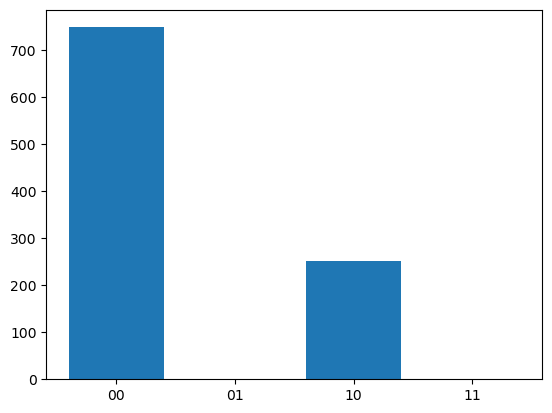

In [257]:
# Apply the gates for the specified number of iterations
num_iterations = int(input('Enter the number of iterations: '))
input_sequence = input(f'Enter the sequence of gates and qubits: ')

print(input_sequence)

initial_state = np.array([[1.0, 0.0], [1.0, 0.0]], dtype=complex)
state = np.kron(initial_state, initial_state)

count_measurements(num_iterations, input_sequence, state)

print("Final State:")
print(state)

# Deutsch Algorithm

The Deutsch algorithm is one of the earliest quantum algorithms that showcases the power of quantum computing in solving specific problems faster than classical computers. The problem it addresses is called the Deutsch problem, which is a variation of the more general Deutsch-Jozsa problem. The Deutsch problem can be described as follows:

- You are given a quantum oracle function, which takes a single input qubit and produces a single output qubit.
- The oracle function is either "balanced" or "constant." In the balanced case, the function is one-to-one, meaning it maps exactly half of its inputs to 0 and the other half to 1. In the constant case, the function always returns the same output, either 0 or 1.
- The goal is to determine whether the oracle function is "balanced" or "constant" using as few queries to the oracle as possible.

## Implementation and Testing

### Custom Quantum Circuit

In this project, I implemented the Deutsch algorithm using a custom quantum circuit in Python. The circuit consists of the following gates and operations:

- **X1**: Apply a Pauli-X gate to the second qubit (index 1) to set it to the state |1⟩.
- **H0 and H1**: Apply Hadamard gates to both qubits (indices 0 and 1) to create superposition states.
- **U01**: Apply a custom unitary gate U01, which represents the quantum oracle function. In this case, I used a controlled-X (CNOT) gate to simulate the oracle. This gate is chosen based on whether the oracle is "balanced" or "constant."
- **H0**: Apply another Hadamard gate to the first qubit (index 0).
- Perform measurements to determine the output of the algorithm.

The algorithm's outcome is probabilistic, and it will correctly identify whether the oracle is "balanced" or "constant" with a high probability.

I tested the custom quantum circuit with the Deutsch algorithm by running it with 10,000 iterations and examining the measurement outcomes.

### Qiskit Implementation

To compare the results, I also implemented the Deutsch algorithm using Qiskit, a popular quantum computing library. The Qiskit circuit follows a similar structure:

`qc.x(1)`

`qc.h(0)`

`qc.h(1)`

`qc.unitary(custom_unitary_gate, [0], label='U01')`

`qc.h(0)`


I used Qiskit to simulate the circuit and measure the outcomes for comparison with the custom circuit's results.

By running both implementations and comparing the measurement outcomes, I can verify the correctness and efficiency of my custom quantum circuit while also demonstrating the usage of Qiskit for similar quantum algorithms.



Measurement Counts:
[4913, 0, 5087, 0]


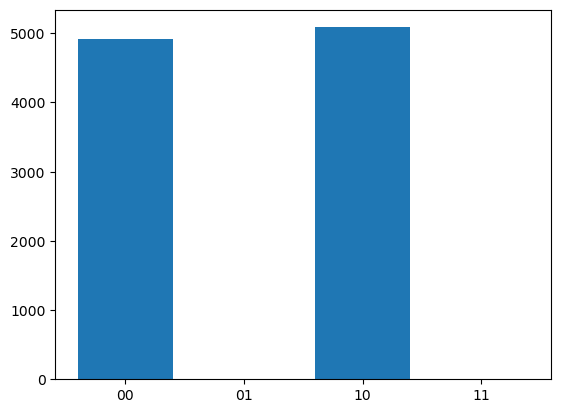

In [260]:
# Initialize the quantum state to [1, 0] (state |0>)
initial_state = np.array([[1.0, 0.0], [1.0, 0.0]], dtype=complex)
state = np.kron(initial_state, initial_state)
oracle = "balanced"
count_measurements(10000, 'X1 H0 H1 U01 H0', state, oracle)

# Testing using Qiskit

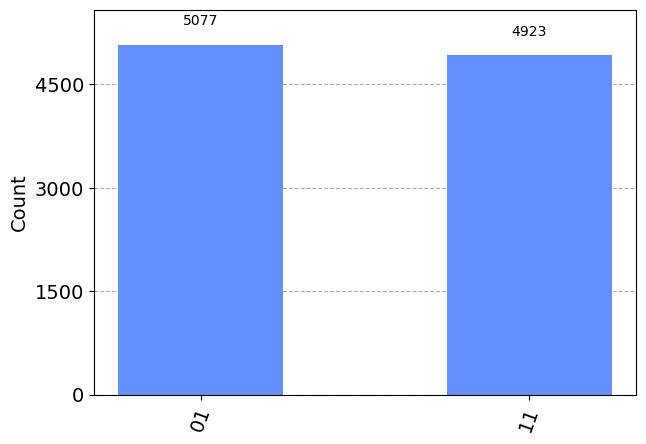

In [270]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

qc.x
qc.cx(0,1)
qc.h(1)

# Measure the qubits
qc.measure_all()

simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
job = execute(compiled_circuit, simulator, shots=10000)
result = job.result()
counts = result.get_counts()

# Create a histogram of measurement outcomes
plot_histogram(counts)


## Testing Deutsch

{'00': 5044, '10': 4956}


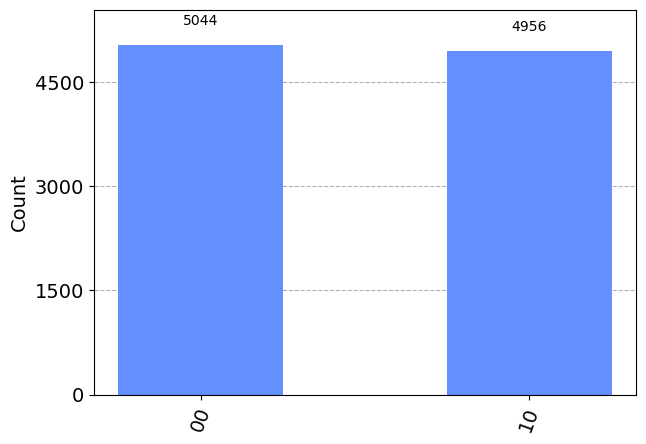

In [271]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.quantum_info import Operator
import numpy as np

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Define a custom 2x2 unitary matrix
custom_unitary_matrix = np.array([[1.0, 0.0],
                                  [0.0, 1.0]], dtype=complex)

# Add a custom unitary gate to the circuit
custom_unitary_gate = Operator(custom_unitary_matrix)

# X1 H0 H1 U01 H0
qc.x(1)
qc.h(0)
qc.h(1)
qc.unitary(custom_unitary_gate, [0], label='U01') 
qc.h(0)

# Measure the qubits
qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = execute(compiled_circuit, simulator, shots=10000)
result = job.result()
counts = result.get_counts()

print(counts)

# Create a histogram of measurement outcomes
plot_histogram(counts)